# Section 1: Business understanding


This project works on Seattle Airbnb data which consists of three table and try to answer these questions

1) How many rooms are cheaper than $75 per night?

2) Which house had the most review?

3) What is the average rating of top houses that were reviewed?

4) What is the percentage of rooms that have strict cancelation policy?

5) How many of rooms with flexible cancellatio policy are less than $75?


In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Section 2: Data Understanding

Gather

In [75]:
#Read the Calendar file

calendar = pd.read_csv("//home//mehrdad532//Research//Udacity//Project1//calendar.csv")  
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [76]:
#Read the listings file
listings = pd.read_csv("//home//mehrdad532//Research//Udacity//Project1//listings.csv")  
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [77]:
#Read the reviews file
reviews = pd.read_csv("//home//mehrdad532//Research//Udacity//Project1//reviews.csv")  
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [78]:

calendar.describe

<bound method NDFrame.describe of          listing_id        date available   price
0            241032  2016-01-04         t  $85.00
1            241032  2016-01-05         t  $85.00
2            241032  2016-01-06         f     NaN
3            241032  2016-01-07         f     NaN
4            241032  2016-01-08         f     NaN
...             ...         ...       ...     ...
1393565    10208623  2016-12-29         f     NaN
1393566    10208623  2016-12-30         f     NaN
1393567    10208623  2016-12-31         f     NaN
1393568    10208623  2017-01-01         f     NaN
1393569    10208623  2017-01-02         f     NaN

[1393570 rows x 4 columns]>

# Section 3: Data Preparation

In [79]:

# First let's remove the nulls from calendar
#Remove all the nulls from the calendar which has a nan in the price column. 
calendar_dropna = calendar.dropna(subset=['price'], how='any')
calendar_dropna 

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
9,241032,2016-01-13,t,$85.00
10,241032,2016-01-14,t,$85.00
14,241032,2016-01-18,t,$85.00
...,...,...,...,...
1393207,10208623,2016-01-06,t,$87.00
1393208,10208623,2016-01-07,t,$87.00
1393211,10208623,2016-01-10,t,$87.00
1393212,10208623,2016-01-11,t,$87.00


In [80]:
#As some of the rows have been removed, we need to reset the index, so the index starts from zero 
#and continuesly goes to the end
calendar_dropna.reset_index(drop=True, inplace=True)

In [81]:
#calendar_dropna['price']<75
# Does not work because price is in string, should be changed to float

In [82]:
#The price is string and in $1,234 format. First lets remove the $ sign
#$ is the first character in the string
calendar_dropna_list=[calendar_dropna['price'][i][1:] for i in range(calendar_dropna['price'].size)]

In [83]:
#Next step is to remove the comma 
calendar_dropna_list2=[ float(calendar_dropna_list[i][0]+calendar_dropna_list[i][2:]) if calendar_dropna_list[i][1]==','   else float(calendar_dropna_list[i]) for i in range(calendar_dropna['price'].size) ]

In [84]:
#The integer price is now in calendar_dropna_list2. Lets drop the previous price column
calendar_dropna.drop('price',axis=1)


,listing_id,date,available
0,241032,2016-01-04,t
1,241032,2016-01-05,t
2,241032,2016-01-13,t
3,241032,2016-01-14,t
4,241032,2016-01-18,t
...,...,...,...
934537,10208623,2016-01-06,t
934538,10208623,2016-01-07,t
934539,10208623,2016-01-10,t
934540,10208623,2016-01-11,t


In [85]:
#Add the corrected price column to our dataframe
calendar_dropna['price']=calendar_dropna_list2

<ipython-input-85-d16c8aeaf42b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendar_dropna['price']=calendar_dropna_list2


# Section 4: Evaluate the Results

In [86]:
# 1) We want to see how many rooms are cheaper than $75 per night
#The dataframe after changing the price to integer
calendar_dropna

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-13,t,85.0
3,241032,2016-01-14,t,85.0
4,241032,2016-01-18,t,85.0
...,...,...,...,...
934537,10208623,2016-01-06,t,87.0
934538,10208623,2016-01-07,t,87.0
934539,10208623,2016-01-10,t,87.0
934540,10208623,2016-01-11,t,87.0


In [87]:
#Applying some statistics methods on the price
#Calculationg the mean of the price of each room per night
calendar_dropna['price'].mean()

137.94485855103355

In [88]:
#The maximum price per night
calendar_dropna['price'].max()

1650.0

In [89]:
#The minimum price per night
calendar_dropna['price'].min()

10.0

In [90]:
#The std of the price per night
calendar_dropna['price'].std()

105.06287002591476

In [91]:
#We want to know what percentages of the room are less than $50
sum(calendar_dropna['price']<50)/calendar_dropna.shape[0]

0.0675657166826103

In [92]:
#What percentages of the rooms are between $50 and $75
sum((calendar_dropna['price']<75) & (calendar_dropna['price']>50)) /calendar_dropna.shape[0]

0.14600734905440313

In [93]:
#In order to find the price of the rooms lets first create the intervals
#the intervals are $25 so it will be (0,25], (25,50], ...
inter = pd.interval_range(start=0, periods=20, freq=25)
calendar_qcut = pd.cut(calendar_dropna['price'], inter)
calendar_qcut

0         (75, 100]
1         (75, 100]
2         (75, 100]
3         (75, 100]
4         (75, 100]
            ...    
934537    (75, 100]
934538    (75, 100]
934539    (75, 100]
934540    (75, 100]
934541    (75, 100]
Name: price, Length: 934542, dtype: category
Categories (20, interval[int64]): [(0, 25] < (25, 50] < (50, 75] < (75, 100] ... (400, 425] < (425, 450] < (450, 475] < (475, 500]]

In [94]:
#Count the number of rooms in each interval
#As the intervals will be out of order, we sort them to become sorted, for visulization we need it to be sorted.
chart = calendar_qcut.value_counts()/calendar_qcut.shape[0]
chart=chart.sort_index()

In [95]:
#For check to see if it is working
chart.index.categories.shape[0]

20

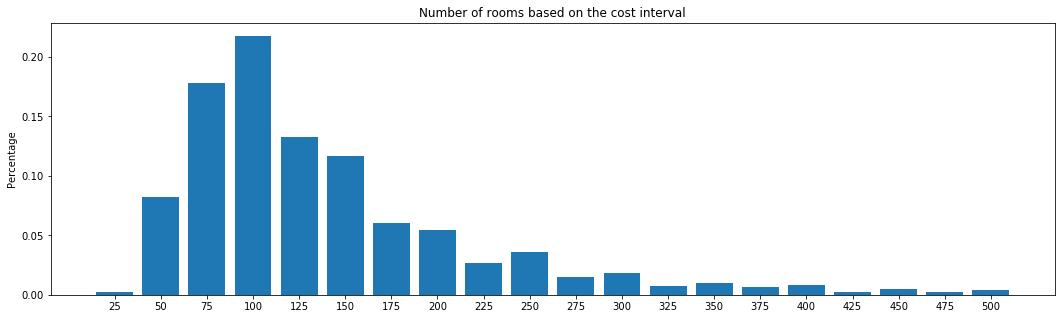

In [96]:
#Plotting the bar chart for the room's price in each interval



fig, ax = plt.subplots(figsize=(18,5))    #Creating the subplot and specifying the figure size

intervals = [i for i in range(0 , chart.index.categories.shape[0])]  #Create the height for each bar

ax.bar(intervals, chart, tick_label = [i*25+25 for i in range (0,20)]) #Creating the bar
#chart.index.categories.shape[0]
ax.set_ylabel('Percentage')    #Set the y label
ax.set_title('Number of rooms based on the cost interval') #Set a title for the chart


plt.show()

Based on the bar chart we can see that there are many rooms that are less than $75 per night.

Even we can find rooms less than $25 per night!!

In [97]:
# 2) Which house had the most review

In [98]:
#The reviews data contains all the reviews, we group them based on the listing id and them count them in order to 
#give us the number reviews for each room, We sort them in descending order

In [99]:
reviews_index=(reviews.groupby('listing_id').count().sort_values(by='id', ascending=False)).index

In [100]:
#The reviews in a descending order
reviews_index

Int64Index([  208356,   365550,    25002,    47196,    63308,    92835,
                5682,   279063,    53867,   841049,
            ...
             6278756,  6289789,  7229312,   103920,  3085726,  6292452,
             6305798,  8080939,  8081658, 10248139],
           dtype='int64', name='listing_id', length=3191)

In [101]:
#Lets take a look at some of the reviews for the room that had most reviews
reviews[reviews['listing_id']==208356]['comments']

1570    Dirk and Jaq were the perfect hosts. They made...
1571    I had a great stay at the artist loft.  It was...
1572    My stay at the loft was ideal.  The loft is lo...
1573    The accomodation is exactly as it is described...
1574    My friend I are so glad we got to stay at the ...
                              ...                        
2039    The artist loft is exactly as advertised!  A w...
2040    My friend and I had a great stay at Dirk and J...
2041    Dirk & Jaq's place was lovely and clean! There...
2042    The room was exactly as shown in the pictures ...
2043                                                よかった。
Name: comments, Length: 474, dtype: object

In [102]:
#What the information of the room that had most reviews
listings[listings['id']==208356][:]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1447,208356,https://www.airbnb.com/rooms/208356,20160104002432,2016-01-04,contemporary art loft downtown [7],** Please read our entire listing description ...,This is studio #7 - one of two private airbnb ...,** Please read our entire listing description ...,none,This is a fun & interesting international neig...,...,9.0,f,NaN,WASHINGTON,f,strict,t,t,3,8.98


In [103]:
#Lets see the price of the room that had most reviews
calendar[calendar['listing_id']==208356][:]

,listing_id,date,available,price
528155,208356,2016-01-04,f,NaN
528156,208356,2016-01-05,t,$75.00
528157,208356,2016-01-06,f,NaN
528158,208356,2016-01-07,f,NaN
528159,208356,2016-01-08,f,NaN
...,...,...,...,...
528515,208356,2016-12-29,t,$89.00
528516,208356,2016-12-30,t,$89.00
528517,208356,2016-12-31,t,$89.00
528518,208356,2017-01-01,t,$89.00


Based on the results, contemporary art loft downtown had the most review, with 8.98 review per month

In [104]:
#3) What is the average rating of top houses that were reviewed
# First drop NANs from reviews score
listings = listings.dropna(subset=['review_scores_value'], how='any', axis=0)

In [105]:
#We have to group the data by id and then take the mean
listings_review_mean = listings[['id','review_scores_value']].groupby('id').mean()
listings_review_mean

,review_scores_value
id,
4291,9.0
5682,10.0
6606,9.0
7369,9.0
9419,9.0
...,...
9970805,10.0
9995551,10.0
10012724,10.0


In [106]:
#Reset the index so the indices starts at zero and are continous
listings_review_mean.reset_index(inplace=True)

In [107]:
#The output for previous step
listings_review_mean

,id,review_scores_value
0,4291,9.0
1,5682,10.0
2,6606,9.0
3,7369,9.0
4,9419,9.0
...,...,...
3157,9970805,10.0
3158,9995551,10.0
3159,10012724,10.0
3160,10020221,10.0


In [108]:
#What is the mean of the review of the room with id 4291
listings_review_mean[listings_review_mean['id']==4291]

,id,review_scores_value
0,4291,9.0


In [109]:
#Take a look at 5 of the scores
[ listings_review_mean[listings_review_mean['id']==reviews_index[i]] for i in range(0,5) ]

[         id  review_scores_value
 103  208356                  9.0,
          id  review_scores_value
 161  365550                  9.0,
        id  review_scores_value
 28  25002                 10.0,
        id  review_scores_value
 35  47196                  9.0,
        id  review_scores_value
 48  63308                 10.0]

In [110]:
listings.shape

(3162, 92)

This question was not a good one as there was just one rating for each one


In [111]:
# 4) What is the numbers of rooms that have strict cancelation policy
#Drop the rows where the cancellation policy is nan
listings = listings.dropna(subset=['cancellation_policy'], how='any', axis=0)

In [112]:
#As we want to find the number of different cancellation policies, we group the listings by cancellation policy
listings_review = listings.groupby('cancellation_policy')
listings_review

In [113]:
#We count each category
(listings_review.count())['id']

cancellation_policy
flexible     775
moderate    1131
strict      1256
Name: id, dtype: int64

There are 775 rooms with flexible cancelltion policy.

Many rooms did not provide this information.

In [114]:
#5) How many of rooms with flexible cancellation policy are less than $75?
#In the listings data choose those which has flexible cancellation policy, and reset the index
listings_flexible_id = listings[listings['cancellation_policy']=='flexible']['id'].reset_index().drop('index', axis=1)
listings_flexible_id

,id
0,6291829
1,9218403
2,8942678
3,5978498
4,5062445
...,...
770,5893969
771,4645405
772,6621924
773,5673552


In [115]:
#Based on the created column, calculate the mean of each room price, this one is for checking to see it works
calendar_dropna.loc[calendar_dropna['listing_id']==listings_flexible_id.iloc[0]['id']]['price'].mean() 


700.0

In [116]:
#Now calculate it for all rooms. This will give the average price for each room.
calendar_flexible = [calendar_dropna.loc[calendar_dropna['listing_id']==listings_flexible_id.iloc[i]['id']]['price'].mean() for i in range(0,listings_flexible_id.shape[0])]

In [117]:
#How many of them are less than $75
low_flexible = [1 if calendar_flexible[i]<75 else 0 for i in range (0,len(calendar_flexible))] 


In [118]:
#Here is the answer
sum(low_flexible)

249

In [119]:
#The whole thing can be written as a function as below

In [120]:
def flexible_less_75(listings, calendar_dropna):
    ''' This function calculate how many rooms have flexible cancellation policy and are less than $75
        
        Input: 
        listings, calendar_dropna data
        
        Output:
        number of rooms with flexible cancellation policy which are less than $75 per night
    '''
    listings_flexible_id = listings[listings['cancellation_policy']=='flexible']['id'].reset_index().drop('index', axis=1)
    calendar_dropna.loc[calendar_dropna['listing_id']==listings_flexible_id.iloc[0]['id']]['price'].mean() 
    low_flexible = [1 if calendar_flexible[i]<75 else 0 for i in range (0,len(calendar_flexible))] 
    return sum(low_flexible)


In [121]:
#Now lets call the function, it will return the same value
num = flexible_less_75(listings,calendar_dropna)
print(num)

249


There are 249 rooms with flexible cancellation policy and that are less than $75.

There may be more rooms with with propoerties, but there were many nan in the cancellations policy.